# Automobile Price Prediction- ML Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
cars = pd.read_csv(r"C:\Users\param/Autodata.csv")
print('Data read successfully')

Data read successfully


In [3]:
cars.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.tail()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [5]:
cars.shape

(205, 25)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
cars.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [8]:
cars.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Data Cleaning 

In [9]:
cars.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
cars['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

#### The 'symboling' column is represented as the risk factor symbol i.e; +3 indicates that the auto is risky, -3 that it is probably pretty safe. 

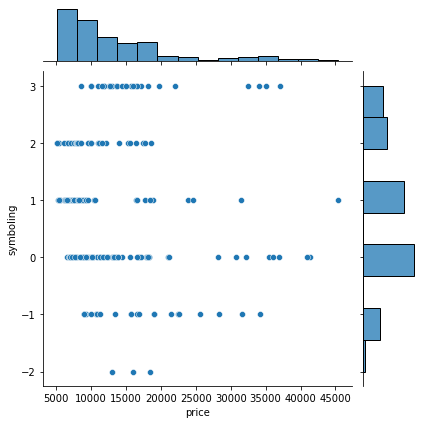

In [11]:
sns.jointplot(y = 'symboling', x = 'price' ,data = cars)

In [12]:
cars['make'].value_counts()

toyota corolla          6
toyota corona           6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
vokswagen rabbit        1
volkswagen model 111    1
toyota carina           1
plymouth cricket        1
mitsubishi pajero       1
Name: make, Length: 147, dtype: int64

#### From the above data we can see that the car name comprises of two parts i.e; the car company and the car model.

In [13]:
cars['car_company'] = cars['make'].apply(lambda x:x.split(' ')[0])

In [14]:
cars.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
cars = cars.drop(['make'], axis =1)

In [16]:
cars['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
mitsubishi     13
honda          13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
maxda           2
renault         2
vw              2
mercury         1
toyouta         1
porcshce        1
Nissan          1
vokswagen       1
Name: car_company, dtype: int64

#### Here some of the car company names are misspelled, so we need to fix them.

In [17]:
cars['car_company'].replace('toyouta', 'toyota',inplace=True)
cars['car_company'].replace('Nissan', 'nissan',inplace=True)
cars['car_company'].replace('maxda', 'mazda',inplace=True)
cars['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars['car_company'].replace('vw', 'volkswagen',inplace=True)
cars['car_company'].replace('porcshce', 'porsche',inplace=True)

In [18]:
cars['car_company'].value_counts()


toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: car_company, dtype: int64

In [19]:
cars['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [20]:
cars['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
cars['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

#### Converte doornumber variable into number.

In [22]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars['doornumber'] = cars[['doornumber']].apply(number_)

In [23]:
cars['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [24]:
cars['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [25]:
cars['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
cars['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
cars['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

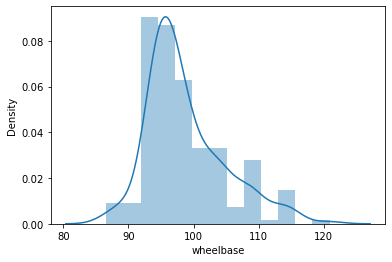

In [28]:
sns.distplot(cars['wheelbase'])
plt.show()

In [29]:
cars['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

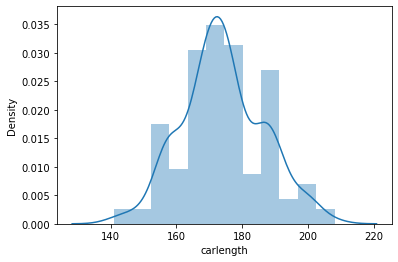

In [30]:
sns.distplot(cars['carlength'])
plt.show()

In [31]:
cars['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [32]:
cars['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

#### Convert cylindernumber into numeric variable.

In [33]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars['cylindernumber'] = cars[['cylindernumber']].apply(convert_number)

In [34]:
cars['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [35]:
cars['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

## Exploratory Data Analysis

### Numeric Variables

In [36]:
cars_num = cars.select_dtypes(include =['int64','float64'])
cars_num.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


#### There are lot of numeric columns in the dataset so we will plot try to find out correlation with Heatmap rather than Pairplot.

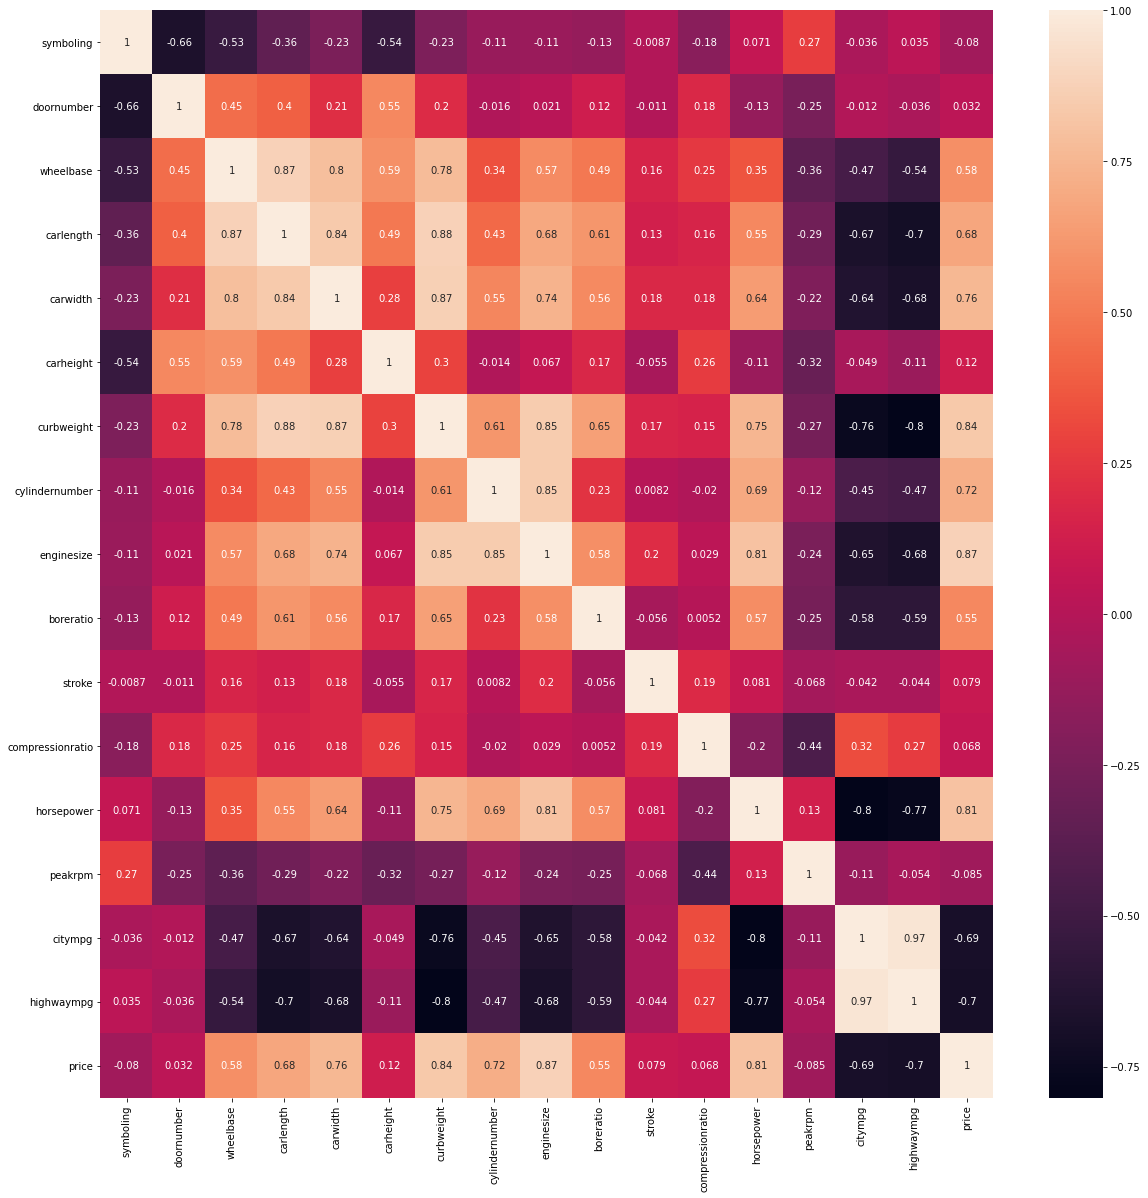

In [37]:
plt.figure(figsize = (20,20))
sns.heatmap(cars.corr(), annot = True)
plt.show()

### Inference:

#### Price is highly(positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.
#### Price is negatively correlated to symboling, citympg and highwaympg.

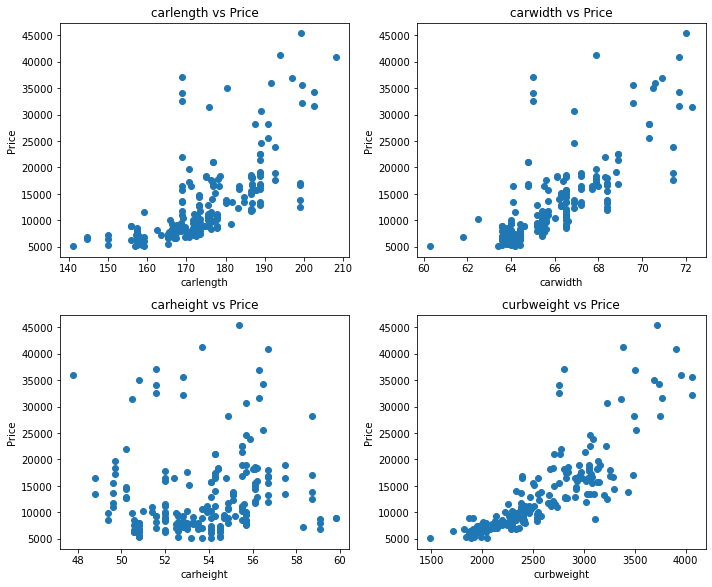

In [38]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

plt.tight_layout()

#### carwidth, carlength and curbweight seems to have a poitive correlation with price.
#### carheight doesn't show any significant trend with price.

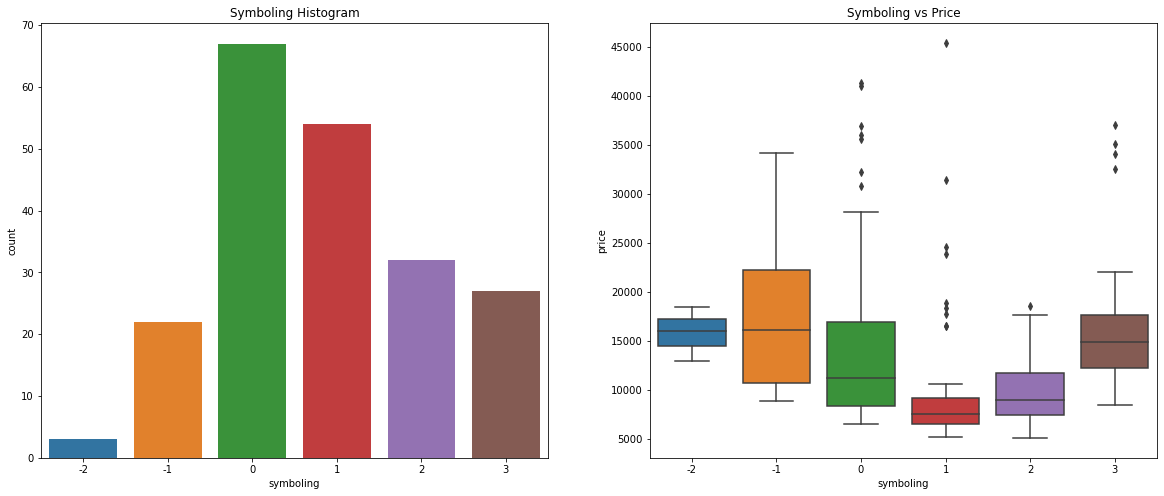

In [39]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(cars.symboling)

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price)
plt.show()

### Inference :

#### It seems that the symboling with 0 and 1 values have higher counts (i.e. They are most sold.)
#### The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

### Categorical Variables

In [40]:
cars_cat = cars.select_dtypes(include = ['object'])
cars_cat.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


<AxesSubplot:xlabel='fuelsystem', ylabel='price'>

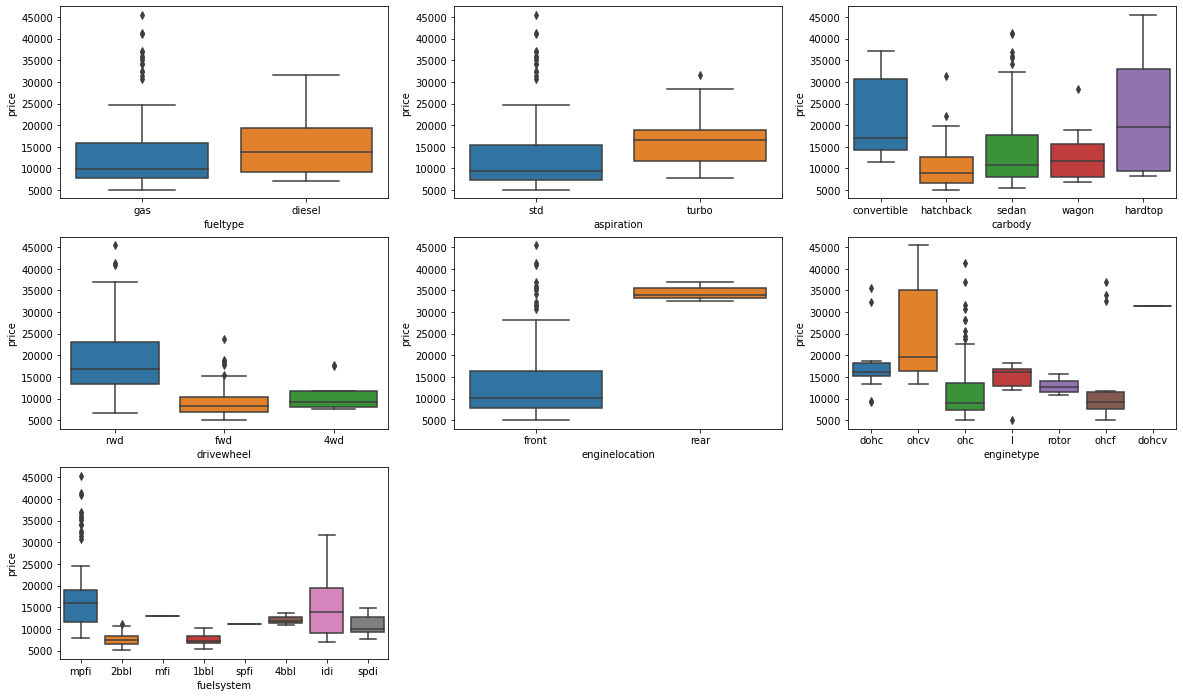

In [41]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars)

<AxesSubplot:xlabel='car_company', ylabel='price'>

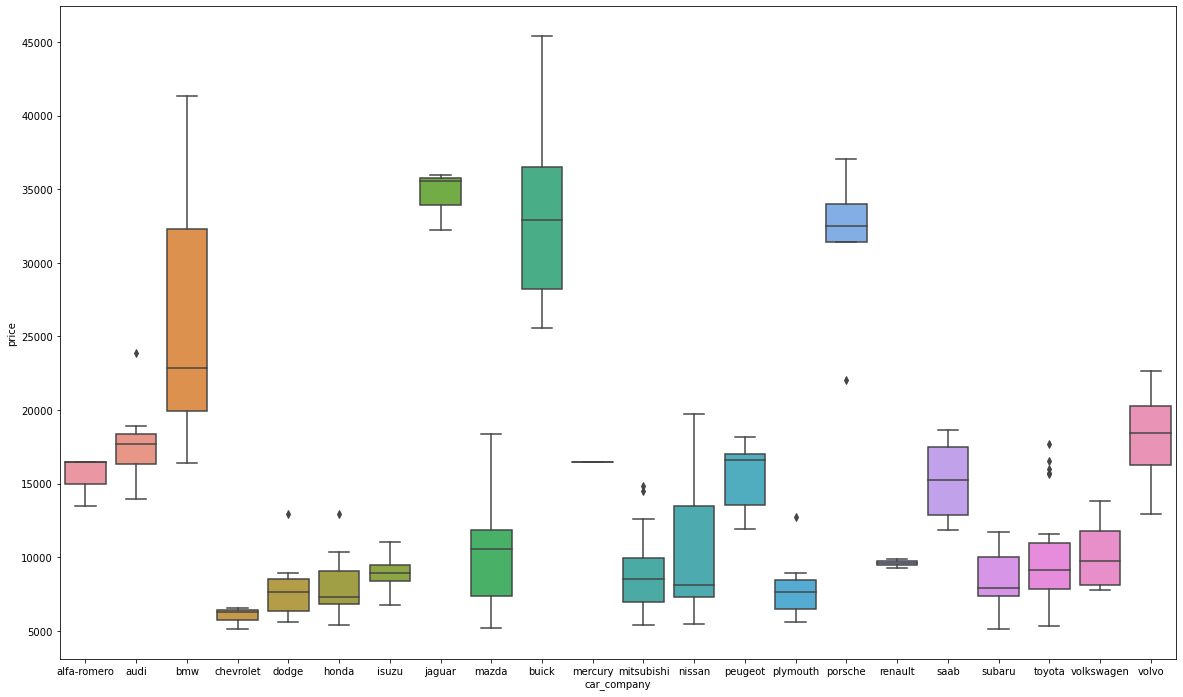

In [42]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars)

##### From the price boxplot it is clear that the car companys with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
##### Whereas the lower priced cars belong to chevrolet
##### The median price of gas vehicles is lower than that of Diesel Vehicles.
##### 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles.
##### Two and four Door vehicles are almost equally priced. There are however some outliers in the price of two-door vehicles.
##### Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have the highest median price.
##### The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.
##### Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines.
##### The median cost of eight cylinder vehicles is higher than other cylinder categories.
##### It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are also some outliers on the higher price side having MPFI systems.
##### Vehicles with OHCV engine type falls under higher price range.

### Data Preprocessing 

In [43]:
cars_dummies = pd.get_dummies(cars_cat, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
car_df  = pd.concat([cars, cars_dummies], axis =1)

In [45]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [46]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   symboling               205 non-null    int64  
 1   doornumber              205 non-null    int64  
 2   wheelbase               205 non-null    float64
 3   carlength               205 non-null    float64
 4   carwidth                205 non-null    float64
 5   carheight               205 non-null    float64
 6   curbweight              205 non-null    int64  
 7   cylindernumber          205 non-null    int64  
 8   enginesize              205 non-null    int64  
 9   boreratio               205 non-null    float64
 10  stroke                  205 non-null    float64
 11  compressionratio        205 non-null    float64
 12  horsepower              205 non-null    int64  
 13  peakrpm                 205 non-null    int64  
 14  citympg                 205 non-null    in

### Performing the train test split operation

In [47]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [48]:
df_train.shape

(143, 60)

In [49]:
df_test.shape

(62, 60)

### Scaling the data using StandardScaler()

In [50]:
from sklearn.preprocessing import StandardScaler

cars_num.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [51]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [52]:
scaler = StandardScaler()

In [53]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [54]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Model Building

In [55]:
y_train = df_train.pop('price')
X_train = df_train

### Performing feature selection using Recursive Feature Elimination (RFE)

In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('doornumber', False, 38),
 ('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 22),
 ('peakrpm', False, 23),
 ('citympg', False, 35),
 ('highwaympg', False, 29),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 21),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 42),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi'

In [59]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

### Model 1

In [60]:
M1 = X_train[cols]
M1_sm = sm.add_constant(M1)

lr_1 = sm.OLS(y_train,M1_sm).fit()

In [61]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           4.59e-64
Time:                        09:13:14   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

#### All the p- values are significant. Let us check VIF

In [62]:
vif = pd.DataFrame()
vif['Features'] = M1.columns
vif['VIF'] = [variance_inflation_factor(M1.values, i) for i in range(M1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


##### VIF is Variance Inflation factor quantifies the extent of correlation between one predictor and the other predictors in a model. It is used for diagnosing collinearity/multicollinearity. We see that there are some variables which have an infinite/large VIF. Without going for manual elimination lets try building model with 10 features using RFE.

### Now building the model with 10 variables

In [63]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [64]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('symboling', False, 46),
 ('doornumber', False, 43),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 21),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 17),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 42),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 24),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 47),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_id

In [65]:
cols1 = X_train.columns[rfe2.support_]
cols1

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

### Model 2

In [66]:
M2 = X_train[cols1]
M2_sm = sm.add_constant(M2)

model_2 = sm.OLS(y_train,M2_sm).fit()

In [67]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.98e-64
Time:                        09:13:15   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [68]:
vif = pd.DataFrame()
vif['Features'] = M2.columns
vif['VIF'] = [variance_inflation_factor(M2.values, i) for i in range(M2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### Let us drop car_company_subaru as it has still VIF of inf.

### Model 3

In [69]:
M3 = M2.drop(['car_company_subaru'], axis =1)
M3_sm = sm.add_constant(M3)

Model_3 = sm.OLS(y_train,M3_sm).fit()

In [70]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           3.98e-64
Time:                        09:13:15   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [71]:
vif = pd.DataFrame()
vif['Features'] = M3.columns
vif['VIF'] = [variance_inflation_factor(M3.values, i) for i in range(M3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


#### Dropping enginetype_ohcf

### Model 4

In [72]:
M4 = M3.drop(['enginetype_ohcf'], axis =1)
M4_sm = sm.add_constant(M4)

Model_4 = sm.OLS(y_train,M4_sm).fit()

In [73]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           8.22e-65
Time:                        09:13:15   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [74]:
vif = pd.DataFrame()
vif['Features'] = M4.columns
vif['VIF'] = [variance_inflation_factor(M4.values, i) for i in range(M4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


#### VIF for car_company_peugeot is still high. Let us drop this column and rebuild the model.

### Model 5

In [75]:
M5 = M4.drop(['car_company_peugeot'], axis =1)
M5_sm = sm.add_constant(M5)

Model_5 = sm.OLS(y_train,M5_sm).fit()

In [76]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.49e-63
Time:                        09:13:15   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [77]:
vif = pd.DataFrame()
vif['Features'] = M5.columns
vif['VIF'] = [variance_inflation_factor(M5.values, i) for i in range(M5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


#### Let us drop the column enginetype_1

### Model 6

In [78]:
M6 = M5.drop(['enginetype_l'], axis =1)
M6_sm = sm.add_constant(M6)

Model_6 = sm.OLS(y_train,M6_sm).fit()

In [79]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.92e-64
Time:                        09:13:15   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [80]:
vif = pd.DataFrame()
vif['Features'] = M6.columns
vif['VIF'] = [variance_inflation_factor(M6.values, i) for i in range(M6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


#### All the VIF & p values seem to be in good range

### Residual Analysis

In [81]:
y_train_pred = Model_6.predict(M6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [82]:
Residual = y_train- y_train_pred

<AxesSubplot:ylabel='Density'>

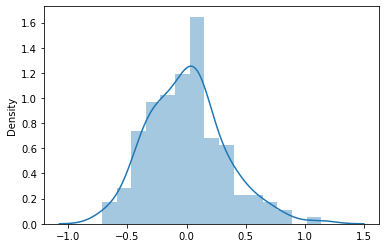

In [83]:
sns.distplot(Residual, bins =15)

### Now we need to make prediction on our model

In [84]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [85]:
y_test = df_test.pop('price')
X_test = df_test

In [86]:
final_cols = M6.columns

In [87]:
X_test_model6= X_test[final_cols]
X_test_model6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [88]:
X_test_sm = sm.add_constant(X_test_model6)

In [89]:
y_pred = Model_6.predict(X_test_sm)

In [90]:
y_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

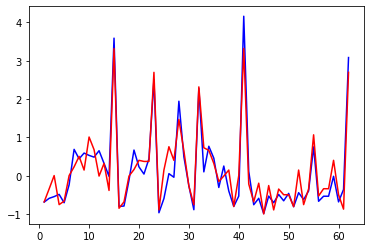

In [91]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')

Text(0, 0.5, 'y_pred')

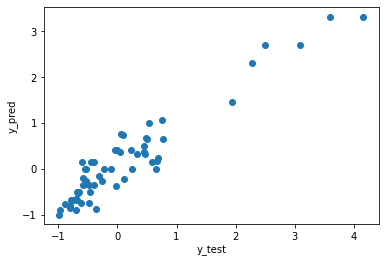

In [92]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

#### Model is performing better but there are some high values which model is not able to explain.

## Model Evaluation

In [93]:
r_sq = r2_score(y_test,y_pred)
r_sq

0.8997211435182687

## The variables which are significant in predicting the price of a car are:

### enginesize, carwidth, enginetype_rotor, car_company_bmw, enginelocation_rear, car_company_renault